# **Table of Contents**

1. **EDA**  
   1.1. Data Summary  
       - Data observation  
   1.2. Univariate Analysis  
       - Observation on diabetes  
       - Observations on gender  
       - Observation for smoking history  
       - Observations on hypertension  
       - Observations on heart disease  
       - Observations on age
       - Observation on BMI  
       - Observations on HbA1c_level  
       - Observations on blood glucose level  
       - Calculate skew of numeric fields  
       - Skew observations  
   1.3. Multivariate Analysis  
       - Observation on correlation between numeric features  

2. **Choice of Model**  
   2.1. Observations Based on EDA  
   2.2. Factors That Affect Model Choice  
   2.3. Exploring Possible Models  
       - Logistic Regression (Linear Model)  
       - Decision Tree  
       - Random Forest (Bagging Model)  
       - Boosted Models (e.g. Gradient Boosting Classifier)  
       - Support Vector Machine (SVM)  
       - K-Nearest Neighbors (KNN)  
   2.4. Feature Engineering Requirements  
   2.5. Models Selected for Final Comparison  

3. **Hyperparameter Tuning**  
   3.1. Options  
   3.2. Comparison of Hyperparameter Tuning Methods  
   3.3. Choice of Metric  
       - Threshold-dependent Metrics  
       - Which Threshold-dependent Metric to Prioritize  
       - Threshold-independent Metrics  
   3.4. Final Metric Decision  
       - Tree model data engineering  
       - Other model data engineering  
       - Hyper parameter tuning for Random forest  
       - Hyper parameter tuning for Gradient Boosting Classifier  
       - Hyper parameter tuning for Hist Gradient Boosting Classifier  
       - Hyper parameter tuning for Decision Tree  
       - Hyper parameter tuning for KNN  
       - Hyper parameter tuning for Logistic Regression  

4. **Final Model Evaluation**  

5. **Loading Selected Model**


In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


# EDA
## Data Summary
- Check data dimension
- Statistical summary 
- Remove any duplicates or missing values

In [10]:
df = pd.read_csv(r"c:\Users\Palan\Desktop\MachineLearning\mainProj\diabetes_prediction_dataset.csv")
print(df.shape, "\n\n", df.dtypes, "\n\n") 
df.head()

(100000, 9) 

 gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object 




,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [11]:
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [12]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [13]:
duplicates = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicates))
df = df.drop_duplicates()

Number of duplicate rows: 3854


In [14]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

#### Data observation:
- There are 100 000 rows and 9 columns
- No null values
- 3854 duplicate rows that were dropped
- Categorical features: gender, hypertension, heart_disease, smoking history
    - hypertension and heart_disease use label encoding with 1 to show anomaly 
    - gender and smoking history categories need to be visaualised to see what categories they have and require label encoding. 
- Numerical features: age, bmi, HbA1c_level, blood_glucose_level

## Univariate Analysis 
- Central tendency 
    - Numeric: mean, median, mode
    - Categorical: most frequent category
- View categories in categorical data 
- Check if there is uniform distribution of values in features
- Check for any abnormalities 
- Check if there is any need for feature engineering

Negative cases: 87664, Positive cases: 8482, Ratio: 0.10


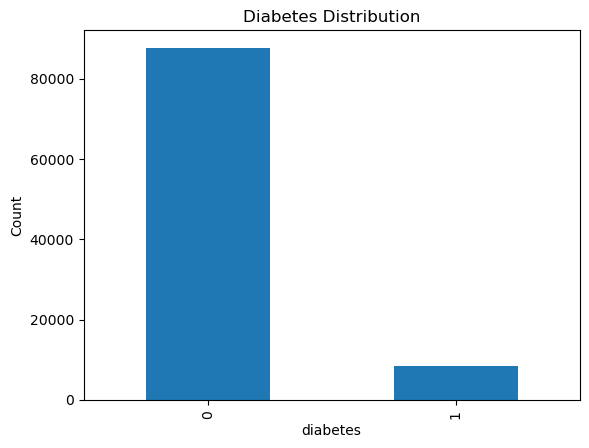

In [15]:
df['diabetes'].value_counts().plot(kind='bar', title='Diabetes Distribution', ylabel='Count')
negative, positive = df['diabetes'].value_counts()
print(f"Negative cases: {negative}, Positive cases: {positive}, Ratio: {positive/negative:.2f}")

#### Observation on diabetes 
- Only 10% of dataset is diabetese positive so it is a rare category.

<Axes: title={'center': 'Gender Distribution'}, xlabel='gender'>

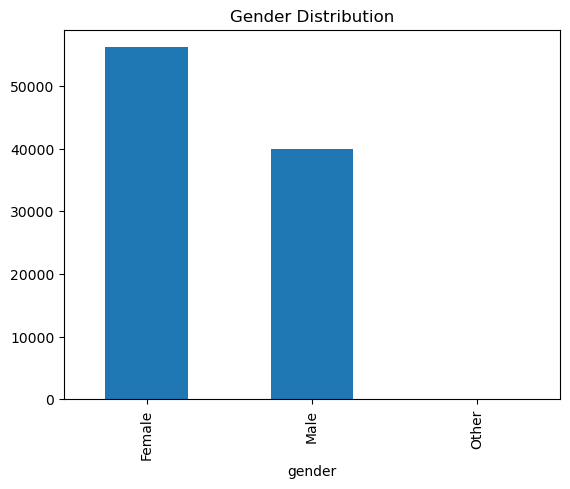

In [16]:
df['gender'].value_counts().plot(kind='bar', title='Gender Distribution')

In [17]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

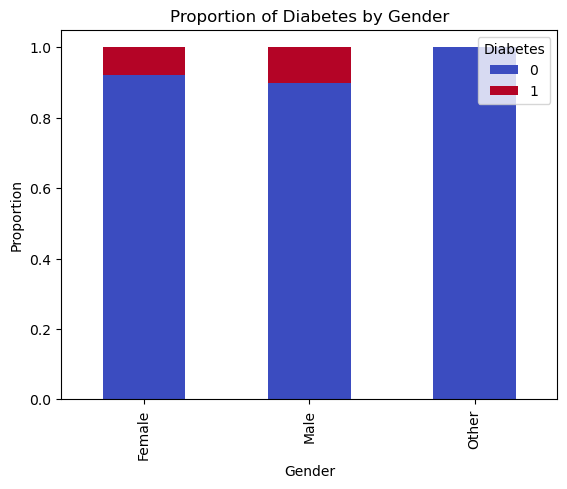

In [18]:
prop_df = df.groupby('gender')['diabetes'].value_counts(normalize=True).unstack()
prop_df.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Proportion of Diabetes by Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.legend(title='Diabetes')
plt.show()

<Axes: title={'center': 'Check Gender Distribution Again'}, xlabel='gender'>

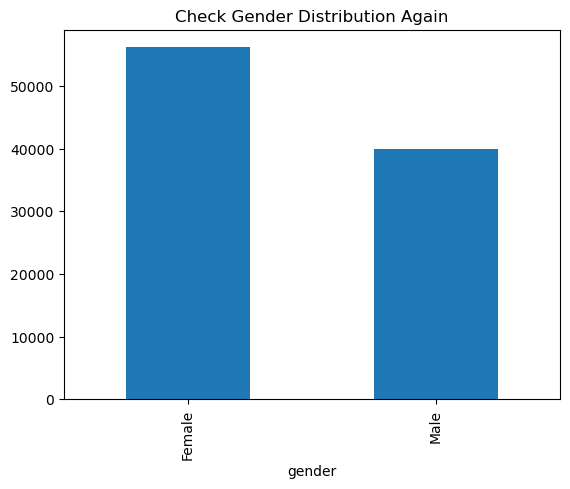

In [19]:
df = df[df['gender']!= 'Other']
df['gender'].value_counts().plot(kind='bar', title='Check Gender Distribution Again')

#### Observations on gender
- gender has 3 values male,female and other; other has only 18 rows and none of the 18 rows have a diabetes case; so it does not carry a signal that the model can learn from so it is better to remove it. 

<Figure size 1000x600 with 0 Axes>

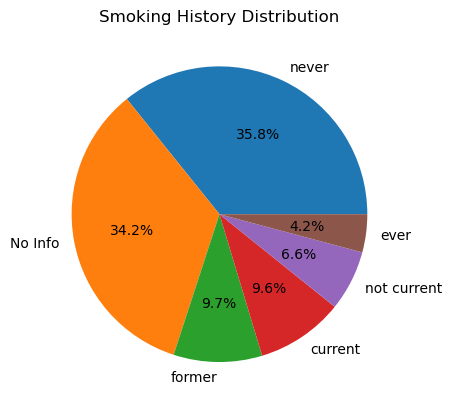

<Figure size 1000x600 with 0 Axes>

In [20]:
df['smoking_history'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Smoking History Distribution', ylabel= '')
plt.figure(figsize=(10, 6))

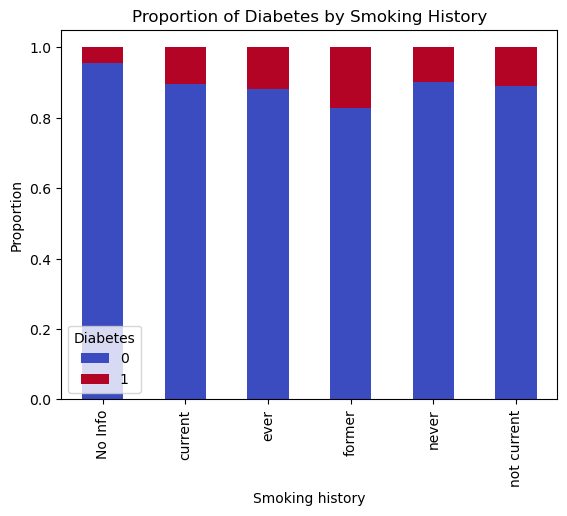

In [21]:
prop_df = df.groupby('smoking_history')['diabetes'].value_counts(normalize=True).unstack()
prop_df.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Proportion of Diabetes by Smoking History')
plt.ylabel('Proportion')
plt.xlabel('Smoking history')
plt.legend(title='Diabetes')
plt.show()


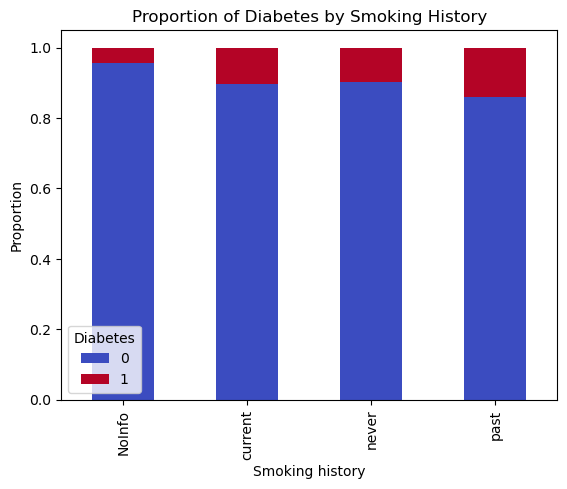

In [22]:
mapping = {
    'former':      'past',
    'not current': 'past',
    'ever':        'past',
    'never':       'never',
    'current':     'current',
    'No Info':     'NoInfo' # remove the space in 'No Info' to 'NoInfo' to avoid issues later on
}
df['smoking_history'] = df['smoking_history'].map(mapping)
prop_df = df.groupby('smoking_history')['diabetes'].value_counts(normalize=True).unstack()
prop_df.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Proportion of Diabetes by Smoking History')
plt.ylabel('Proportion')
plt.xlabel('Smoking history')
plt.legend(title='Diabetes')
plt.show()

#### Observation for smoking history
- Smoking history has 6 values ("No info", "never", "former", "current", "not current" and "ever")
- "No info" and "current categories" have the most occurrence while the other categories have less than 10% of total occurrence 
- It makes logical sense to merge "ever", "former" and "not current" together under the category past 
    - This does not affect the prediction as the proportion of diabetes for "ever", "former" and "not current" are fairly similar. 


<Axes: title={'center': 'Hypertension Distribution'}, xlabel='hypertension'>

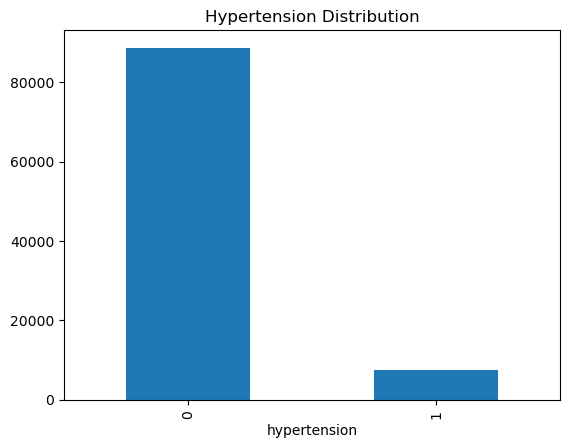

In [23]:
df['hypertension'].value_counts().plot(kind='bar', title='Hypertension Distribution')

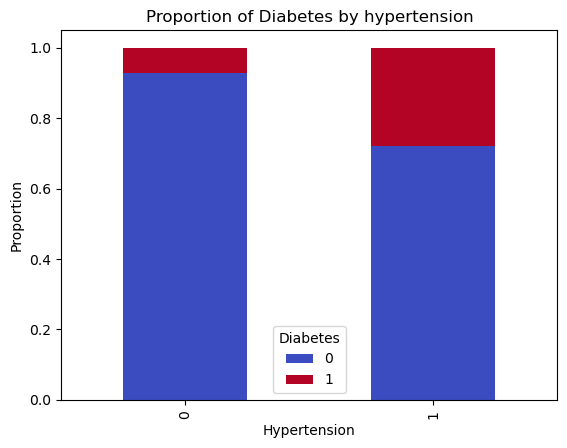

In [24]:
prop_df = df.groupby('hypertension')['diabetes'].value_counts(normalize=True).unstack()
prop_df.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Proportion of Diabetes by hypertension')
plt.ylabel('Proportion')
plt.xlabel('Hypertension')
plt.legend(title='Diabetes')
plt.show()

### Observations on hypertension 
- Distribution of hypertension is not normal as hypertension positive is rare. 
- There is a high correlation of diabetes with hypertension; the proportion of diabetes by hypertension table shows that proportion of diabetes greatly increases with hypertension positive.

<Axes: title={'center': 'Heart disease Distribution'}, xlabel='heart_disease'>

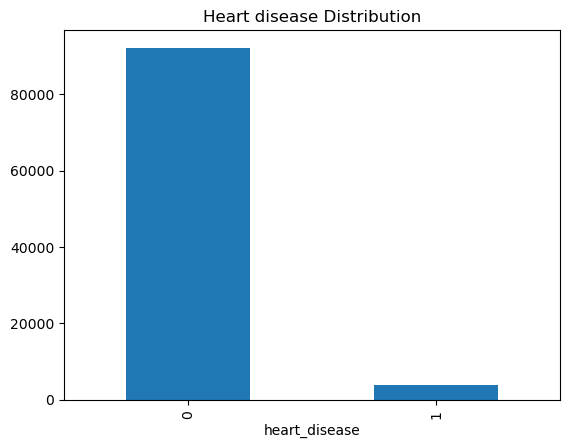

In [25]:
df['heart_disease'].value_counts().plot(kind='bar', title='Heart disease Distribution')

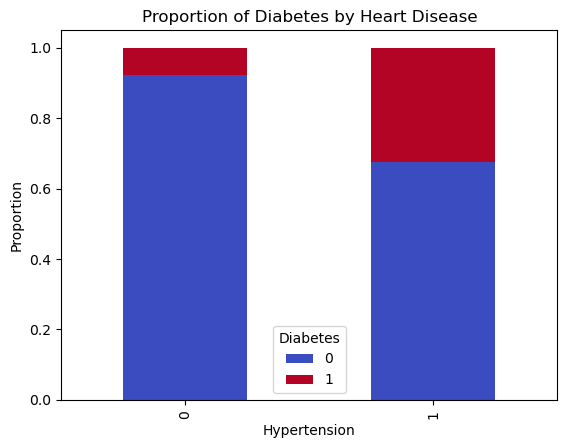

In [26]:
prop_df = df.groupby('heart_disease')['diabetes'].value_counts(normalize=True).unstack()
prop_df.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Proportion of Diabetes by Heart Disease')
plt.ylabel('Proportion')
plt.xlabel('Hypertension')
plt.legend(title='Diabetes')
plt.show()

### Observations on heart disease
- Distribution of heart disease is not normal as heart disease positive is rare. 
- There is a high correlation of diabetes with heart disease; the proportion of diabetes by heart disease table shows that proportion of diabetes greatly increases with heart disease positive.

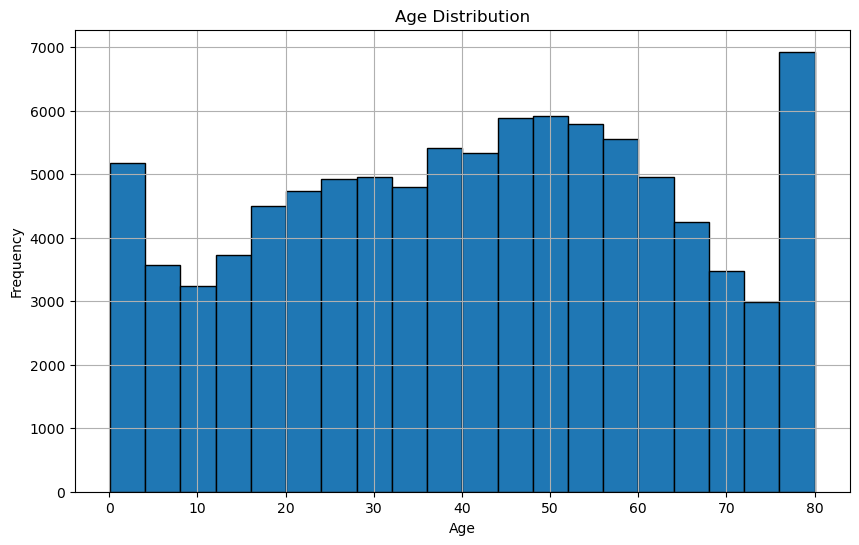

In [27]:
plt.figure(figsize=(10, 6))
df['age'].hist(bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

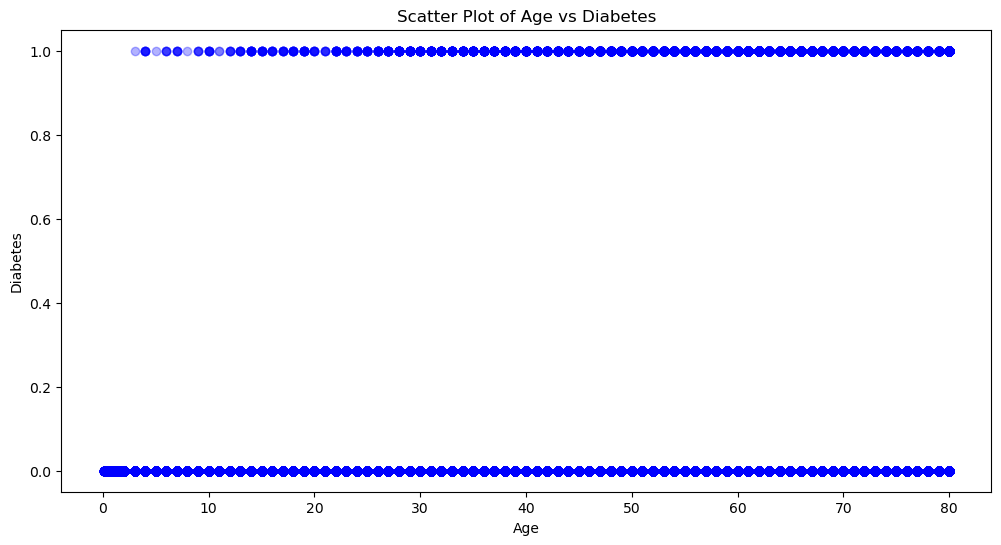

In [28]:
plt.figure(figsize=(12,6))
plt.scatter(df['age'], df['diabetes'], color='blue', alpha=0.3)
plt.xlabel('Age')
plt.ylabel('Diabetes')
plt.title('Scatter Plot of Age vs Diabetes')
plt.show()

### Observations on age
- The distribution of age is mostly uniform with low skew.
- There is high linear correlation of age with diabetes. The number of diabetics greatly increase with age

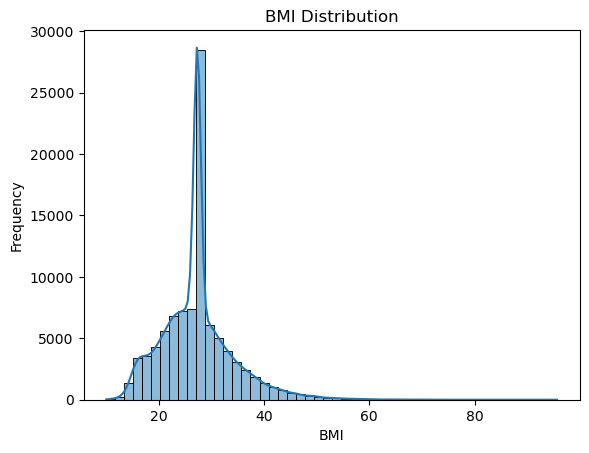

In [29]:
sns.histplot(df['bmi'], bins=50, kde = True, edgecolor='black') #kde = True adds a kernel density estimate
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

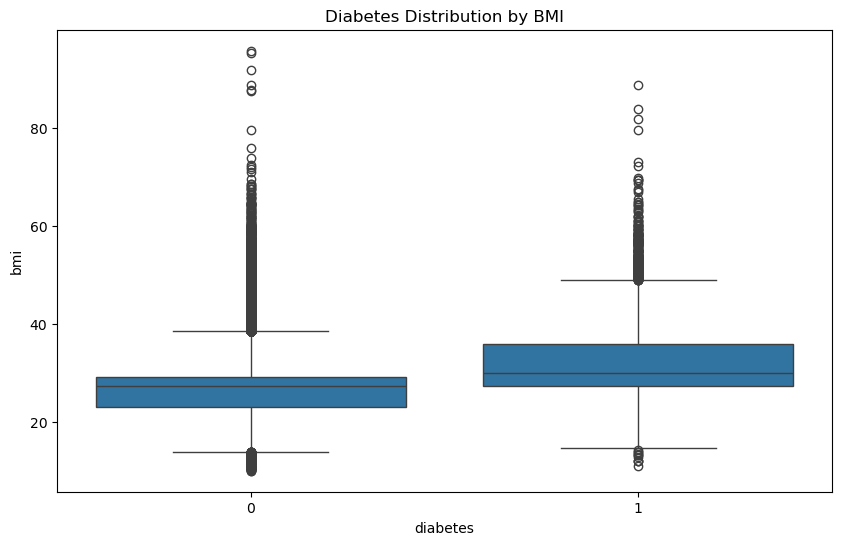

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('Diabetes Distribution by BMI')
plt.show()

### Observation on BMI 
- BMI distribution histogram:
    - BMI distribution is right skewed; most rows have low BMI. 
    - There is a high spike in BMI range 27-30
- In the diabetes distribution by BMI boxplot the median of diabetes positive is higher than that of negative; this means there is a correlation of high BMI with risk of diabetes.
- BMI should not be binned as there is no clear clustering of values in the histogram to show what is underweight and what is obese. 


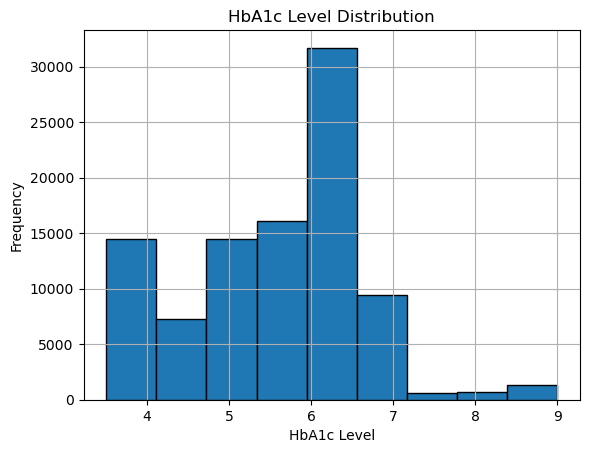

In [31]:
df['HbA1c_level'].hist(bins=9, edgecolor='black')
plt.title('HbA1c Level Distribution')               
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')
plt.show()

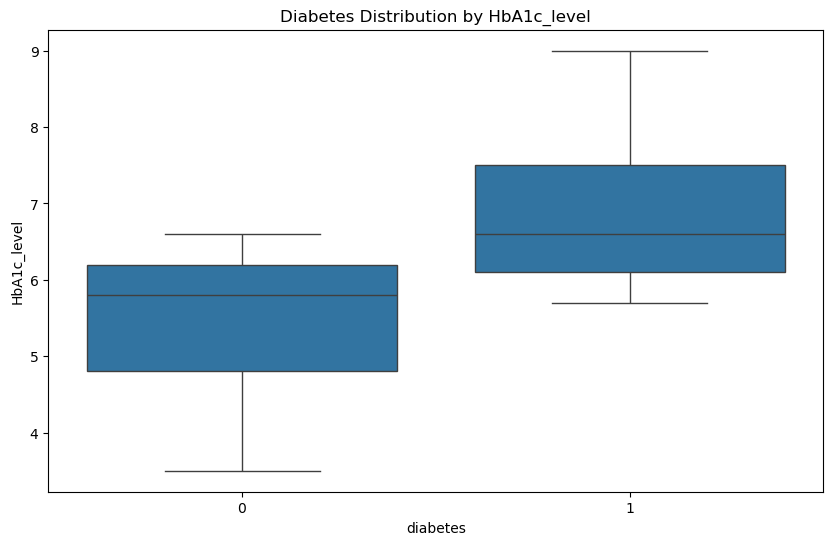

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('Diabetes Distribution by HbA1c_level')
plt.show()

#### Observations on HbA1c_level
- The distribution of HbA1C_level is not normal and right skewed
- In the Diabetes Distribution by HbA1c_level boxplot; the median of diabetes positive has a much higher median than that of diabetes negative this shows that there is a high correlation between high HbA1c_level and likelihood of diabetes. 

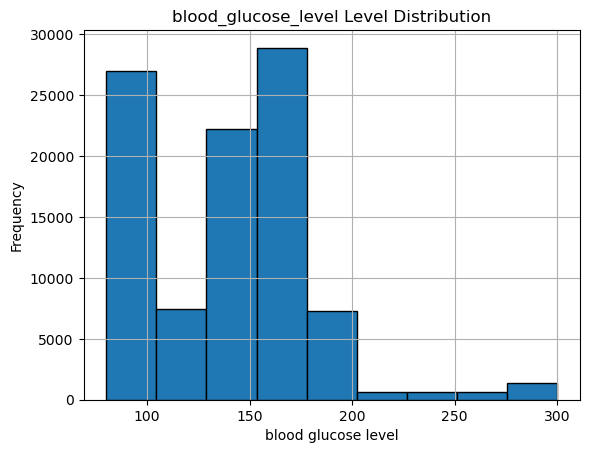

In [33]:
df['blood_glucose_level'].hist(bins=9, edgecolor='black')
plt.title('blood_glucose_level Level Distribution')               
plt.xlabel('blood glucose level')
plt.ylabel('Frequency')
plt.show()

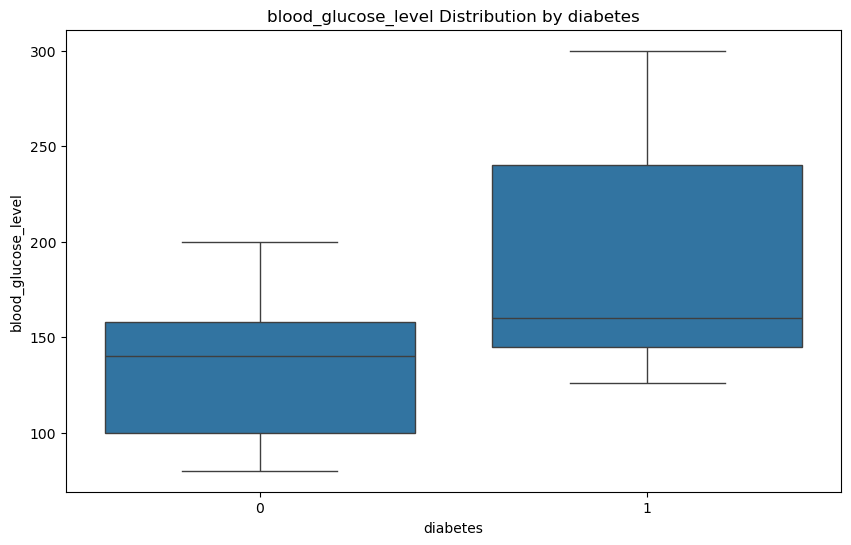

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('blood_glucose_level Distribution by diabetes')
plt.show() 

#### Observations on blood glucose level
- The distribution of blood glucose level is not normal
- In the Diabetes Distribution by blood glucose level boxplot; the median of diabetes positive has a higher median than that of diabetes negative this shows that there is a  correlation between high HbA1c_level and likelihood of diabetes. 

### Calculate skew of numeric fields
- im not sure if the skew i observed is correct so here is the code to verify

In [35]:
# Calculate skewness for numeric columns
numeric_cols = df.select_dtypes(include='number').columns
skew_values = df[numeric_cols].skew()
print("Skewness of numeric columns:")
print(skew_values)

Skewness of numeric columns:
age                   -0.062585
hypertension           3.157297
heart_disease          4.641865
bmi                    1.023945
HbA1c_level           -0.054330
blood_glucose_level    0.836615
diabetes               2.903483
dtype: float64


#### skew observations
- age: -0.05 
    - very close to 0, nearly symmetric distribution
- hypertension: 3.23 
    - highly right-skewed, most values are 0, few are 1
- heart_disease: 4.73 
    -highly right-skewed, most values are 0, few are 1
- bmi: 1.04 
    - moderately right-skewed, more low BMI values, some high outliers
- HbA1c_level: -0.07 
    - almost symmetric
- blood_glucose_level: 0.82 
    - moderate right skew, more low values, some high outliers
- diabetes: 2.98 
    - highly right-skewed, most people are non-diabetic

## Multivariate Analysis

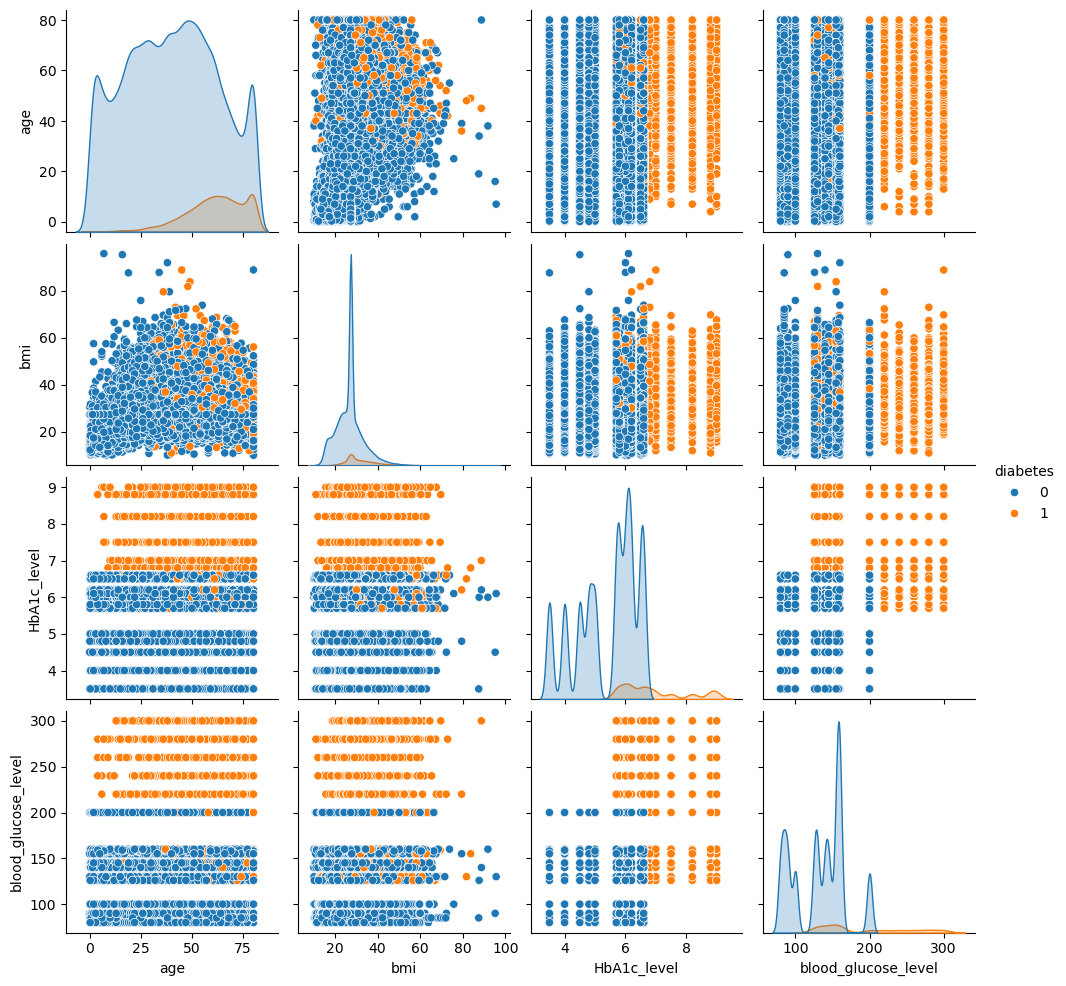

In [36]:
# Pair plot for numeric features
sns.pairplot(df, vars = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], hue='diabetes')
plt.show()

### observation on correlation between numeric features
- Diabetics are more common in older age groups as the age distribution of diabetics is right skewed
- Both diabetics and non diabetics are most concentrated between 20-40BMI; however there is no clear seperation showing that BMI does not have strong correlation with target. 
- HbA1c_level has strong seperation as more than 6.5 means diabetic while non diabetics are mostly between 4-6.5. High correlation with target.
- Blood glucose level has strong seperation; more than 200 is mostly diabetic whereas less than 200 is mostly non diabetics. High correlation with target
- Older individuals with higher glucose are mostly diabetic (orange).
- High glucose and high HbA1c → diabetic.Low values of both → non-diabetic. There is a positive correlation between HbA1c_level and blood_glucose_level as HbA1c_level tends to increase with blood_glucose_level
- There is no strong correlation between bmi and blood_glucose.
- There is no strong correlation between bmi and HbA1c_level.
- Younger indviduals are less likely to have high HbA1c_level


### Choice of Model

#### Observations Based on EDA

The dataset is large with approximately 100,000 rows. It includes both numeric and categorical features. Some variables like `age` show a linear trend with diabetes, while others like `blood_glucose_level` and `HbA1c_level` show threshold-based (non-linear) patterns — values above 200 and 6.5 respectively are usually diabetic. Features like `hypertension` and `heart_disease` show clear impact on diabetes risk.

Many features are not evenly distributed, and some categories are rare. The target feature `diabetes` itself is imbalanced, with only about 10% of cases being positive.

---

#### Factors That Affect Model Choice

- The problem is classification, since the target (`diabetes`) has two categories.
- Several features have rare categories, and the positive class is rare.
- There are both linear and non-linear relationships in the data.
- Some numeric features are skewed, and some categories have few examples.
- Accuracy is not reliable because it may just predict the majority class and still appear correct.

---

#### Exploring Possible Models

All the models considered are classification models that can handle both numeric and categorical features (with appropriate preprocessing):

##### 1. Logistic Regression (Linear Model)

- A simple model that works well when the relationship is linear.
- Can handle class imbalance using `class_weight='balanced'`.
- Struggles with non-linear patterns, which are present here.
- Sensitive to skewed features and outliers — may need log transformation or binning.
- Good for baseline comparison, but may not be the best performer.

---

##### 2. Decision Tree

- Splits data using simple rules (e.g., “if blood_glucose > 200…”).
- Handles non-linear relationships and rare categories well.
- Not affected by feature scaling or skewed features.
- Can overfit easily; should limit tree depth (`max_depth`) and leaf size (`min_samples_leaf`).
- Interpretable and easy to visualize, but less accurate alone.

---

##### 3. Random Forest (Bagging Model)

- An ensemble of decision trees trained on random samples.
- Reduces overfitting by combining predictions of many trees.
- Handles imbalanced data and all types of relationships well.
- Not sensitive to feature scaling or skewness.
- Generally more stable and accurate than a single tree.

---

##### 4. Boosted Models (e.g. Gradient Boosting Classifier)

- Builds trees sequentially, each correcting mistakes of the previous.
- Excels at finding complex patterns and thresholds (like blood glucose > 200).
- Focuses more on rare positive cases, improving recall.
- Needs careful tuning (`learning_rate`, `max_depth`, `early_stopping`) to avoid overfitting.
- High-performance and often top-performing for structured data.

---

##### 5. Support Vector Machine (SVM)

- Tries to find the best boundary (margin) between classes.
- Good at capturing complex boundaries in smaller datasets.
- Requires all features to be numeric; categories must be one-hot encoded.
- Very sensitive to feature scaling and outliers.
- Too slow for large datasets like this one (~100k rows), so not selected.

---

##### 6. K-Nearest Neighbors (KNN)

- A lazy learner that makes predictions based on the most similar points.
- Struggles with rare classes, as it's influenced by local data density.
- Requires standardization of numeric features and one-hot encoding of categories.
- Slow and inefficient on large datasets due to real-time distance calculations.
- Not suitable for this dataset, but can serve as a baseline model.

---

#### Feature Engineering Requirements

| Model                        | Scaling Required       | Encoding Required      | Skew Handling Needed      | Notes                                         |
| ---------------------------- | ---------------------- | ---------------------- | ------------------------- | --------------------------------------------- |
| Logistic Regression          | Yes (`StandardScaler`) | Yes (One-Hot Encoding) | Yes (e.g., log transform) | Assumes linearity; sensitive to skew/outliers |
| Decision Tree Classifier     | No                     | Yes (Label Encoding)   | No                        | Easy to interpret, risk of overfitting        |
| Random Forest Classifier     | No                     | Yes (Label Encoding)   | No                        | Ensemble of trees, good generalization        |
| Gradient Boosting Classifier | No (optional)          | Yes (Label Encoding)   | No                        | Slower but effective, handles complexity      |
| Hist Gradient Boosting Classifier | No (optional)    | Yes (Label Encoding)   | No                        | Faster than GB, built-in categorical support  |
| SVM (`SVC`)                  | Yes (`StandardScaler`) | Yes (One-Hot Encoding) | Yes                       | Not scalable for large data                   |
| K-Nearest Neighbors          | Yes (`StandardScaler`) | Yes (One-Hot Encoding) | Yes                       | Impractical for large datasets                |


- Logistic regression, SVM and KNN all require scalling and one hot encoding while Decision trees, Boosting Models and Bagging Models dont require scalling and require label enconding. So i decided to do seperate feature engineering for the 2 groups.
- For skew handling only bmi and blood glucose level require handling as the other skewed features are binary category that do not need skew handling.

#### Models Selected for Final Comparison

| Model                   | Reason for Selection |
|-------------------------|----------------------|
| Random Forest           | Handles all feature types well, balances performance and overfitting risk through ensembling. Suitable for mixed feature types and imbalanced classes. |
| Gradient Boosting Classifier                 | Excels at finding complex patterns and thresholds (like blood glucose > 200). Focuses more on rare positive cases, improving recall. Needs careful tuning to avoid overfitting. |
| Hist Gradient Boosting Classifier         | Faster, more memory-efficient version of gradient boosting with built-in categorical support. Handles missing values well and typically requires less hyperparameter tuning. |
| Decision Tree           | Simple and interpretable baseline model that handles non-linear relationships and rare categories. Useful for quick testing and comparison. |
| K-Nearest Neighbors (KNN)| Provides a simple, instance-based baseline; included for comparison, though not practical for large datasets. |
| Logistic Regression     | Linear baseline model, interpretable and fast; included for comparison and as a reference for more complex models. |

* Removed SVM as it is very slow on large datasets

### Hyperparameter tuning

##### Options
1. GridSearchCV
2. RandomizedSearchCV
3. Optuna

##### Comparison of Hyperparameter Tuning Methods

| Method             | Search Strategy         | Pros                                                                 | Cons                                                                | When to Use                         |
|--------------------|------------------------|----------------------------------------------------------------------|---------------------------------------------------------------------|-------------------------------------|
| GridSearchCV       | Exhaustive grid search | Simple, easy to understand; finds best parameters in defined grid    | Computationally expensive; slow for large search spaces             | Small parameter spaces              |
| RandomizedSearchCV | Random sampling        | Faster than grid search; can explore more combinations               | May miss optimal parameters; results can vary between runs          | Large parameter spaces, limited time|
| Optuna             | Bayesian optimization  | Efficient, adaptive search; can find good parameters with fewer trials| More complex to set up; less interpretable than grid/random search  | Large/complex spaces, best performance|

For a dataset with 100,000 rows, **RandomizedSearchCV** is a practical choice for quick, broad exploration, while **Optuna** is recommended for more efficient, advanced tuning when aiming for the best performance. GridSearchCV is generally too slow for such a large datasets. So to optimise time and efficiency i am going to use Optuna





### Choice of Metric

Machine learning models for diabetes prediction should be evaluated using metrics that consider class imbalance (~10% positive cases) and the critical cost of missing a diabetic patient.

---

#### Threshold-dependent Metrics
Threshold-dependent metrics depend on choosing a specific decision threshold to convert predicted probabilities into class labels.  
Useful for actual prediction evaluation when deciding who is classified as diabetic.

1. Recall = TP/ TP + FN 
- Meaning: Of all actual diabetic cases, how many were correctly predicted as diabetic.

2. Precision = TP/ TP + FP
- Meaning: Of all patients predicted as diabetic, how many actually have diabetes.

3. F1 Score  = (Precision * Recall) / (Precision + Recall)
- Meaning: Harmonic mean of Precision and Recall; balances trade-offs, especially in imbalanced datasets.

4. Accuracy (not suitable here)  
- With only ~10% positives, predicting all patients as non-diabetic would yield ~90% accuracy, making it misleading.

---

#### Which Threshold-dependent Metric to Prioritize
- Recall is the most critical: In diabetes prediction, missing a diabetic (FN) is far worse than a false alarm (FP).  
- However, very low Precision is problematic: Too many false positives lead to unnecessary stress and medical tests.  
- F1 Score (or F2 Score) can be used to balance Recall and Precision, with F2 weighting Recall more heavily.

---

#### Threshold-independent Metrics
Threshold-independent metrics evaluate performance across all possible thresholds, giving a more holistic view of the model.

1. ROC-AUC (Receiver Operating Characteristic – Area Under Curve)  
- Measures how well the model ranks positives vs negatives across thresholds.  
- Good for general model comparison but less reliable in imbalanced datasets because it considers TNs heavily.

2. PR-AUC (Precision-Recall Area Under Curve)  
- Focuses only on the positive class.  
- Better suited for imbalanced medical data, as it shows how well the model balances Recall and Precision across thresholds.

---

### Final Metric decision
- Primary metric to train models: PR AUC 
    - Using recall to train models will make model ove predict positives resulting in high recall and poor precision
    - ROC AUC performs poorly on imbalanced data; in this dataset ROC AUC will look great even if recall is poor due to TNs dominating imbalanced data
- Model selection metrics: Recall, Precision and F1 score
    - Check if model recall is high while making precision is not too low.
- Secondary model selection metric: Confusion matrix
    - Used to compare the values for TN, FN, FP and TP

##### Tree model data engineering
- require label encoding gender and smoking history
- do not need scaling


In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Split first
df_LE = df.copy()
X_LE = df_LE.drop('diabetes', axis=1)
y_LE = df_LE['diabetes']

X_LE_train, X_LE_test, y_LE_train, y_LE_test = train_test_split(
    X_LE, y_LE, test_size=0.2, random_state=42, stratify=y_LE
)

# Fit encoder only on training set to prevent data leakage
le_gender = LabelEncoder()
le_smoking = LabelEncoder()

X_LE_train['gender'] = le_gender.fit_transform(X_LE_train['gender'])
X_LE_train['smoking_history'] = le_smoking.fit_transform(X_LE_train['smoking_history'])

# Transform test set using same mapping
X_LE_test['gender'] = le_gender.transform(X_LE_test['gender'])
X_LE_test['smoking_history'] = le_smoking.transform(X_LE_test['smoking_history'])

##### Other model data engineering
- require OHE gender and smoking history
- do need scaling
- skew has to be handled using log transform for BMI and blood glucose level (based on skewness analysis)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# 1. Copy original dataframe
df_OHE = df.copy()

# 2. Handle skewness (log-transform for linear models)
df_OHE['bmi'] = np.log1p(df_OHE['bmi'])  
df_OHE['blood_glucose_level'] = np.log1p(df_OHE['blood_glucose_level'])

# 3. One-hot encode categorical variables
df_OHE = pd.get_dummies(df_OHE, columns=['gender', 'smoking_history'])

# 4. Split BEFORE scaling (to prevent leakage)
X_OHE = df_OHE.drop('diabetes', axis=1)
y_OHE = df_OHE['diabetes']

X_OHE_train, X_OHE_test, y_OHE_train, y_OHE_test = train_test_split(
    X_OHE, y_OHE, test_size=0.2, random_state=42, stratify=y_OHE
)

# 5. Scale numeric features ONLY on training data
numerical = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

scaler = StandardScaler()
X_OHE_train[numerical] = scaler.fit_transform(X_OHE_train[numerical])  # fit only on train
X_OHE_test[numerical] = scaler.transform(X_OHE_test[numerical])        # transform test


#### Code to handle stopping model training if no improvement
- I wasnt sure what ntrials to set for each model and i felt like setting a number to stop at is guessing when model will be optimal so i created this function
- It stops model when no improvement in last 50 trials (50 to be very certain model has reached best result)

In [60]:
def early_stop_callback(no_improve_trials):
    # Returns a callback function that stops the study if there is no improvement for `no_improve_trials`.

    best_score = {"value": -1, "no_improve_count": 0} # -1 so no matter what, the first trial will be better

    def callback(study, trial):
        nonlocal best_score
        if trial.value > best_score["value"]: # Update best score if current trial is better
            best_score["value"] = trial.value # Update the best score
            best_score["no_improve_count"] = 0 # Reset no improvement count
        else:
            best_score["no_improve_count"] += 1  # Increment no improvement count  

        if best_score["no_improve_count"] >= no_improve_trials:
            print(f"Early stopping: No improvement in {no_improve_trials} trials.")
            study.stop()

    return callback


##### Hyper parameter tuning for Random forest
| Parameter           | What It Does                                       | Typical Range                                      |
| ------------------- | -------------------------------------------------- | -------------------------------------------------- |
| n_estimators        | Number of trees in the forest                      | 300 to 1000                                        |
| max_depth           | Maximum depth of each tree                         | None, or 5 to 30                                   |
| min_samples_split   | Minimum samples to split a node                    | 2 to 20                                            |
| min_samples_leaf    | Minimum samples required at a leaf node            | 1 to 10                                            |
| max_features        | Number of features to consider when splitting      | auto, sqrt, log2, float (e.g. 0.3–1.0)             |
| bootstrap           | Whether to use bootstrap sampling                  | True or False                                      |
| class_weight        | Handle class imbalance                             | balanced, balanced_subsample, or custom            |
| criterion           | Function to measure the quality of a split         | gini or entropy                                    |



In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    # Example for RandomForestClassifier, adapt for other models as needed

    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        class_weight='balanced',
        n_jobs=-1
    )
    
    score = cross_val_score(clf, X_LE_train, y_LE_train, cv=3, scoring='average_precision').mean()
    return score

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, callbacks=[early_stop_callback(50)])

print("Best PR-AUC:", study_rf.best_trial.value)
print("Best Params:", study_rf.best_trial.params)

[I 2025-07-27 21:47:43,581] A new study created in memory with name: no-name-8f52b0f2-af8b-4f71-ba19-bb4981b469f0
[I 2025-07-27 21:47:52,313] Trial 0 finished with value: 0.8823494339652793 and parameters: {'n_estimators': 601, 'max_depth': 10, 'min_samples_split': 17, 'min_samples_leaf': 13}. Best is trial 0 with value: 0.8823494339652793.
[I 2025-07-27 21:48:05,209] Trial 1 finished with value: 0.8804905925387013 and parameters: {'n_estimators': 908, 'max_depth': 8, 'min_samples_split': 17, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.8823494339652793.
[I 2025-07-27 21:48:16,416] Trial 2 finished with value: 0.8776282755051626 and parameters: {'n_estimators': 786, 'max_depth': 6, 'min_samples_split': 20, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8823494339652793.
[I 2025-07-27 21:48:24,866] Trial 3 finished with value: 0.8680417546602478 and parameters: {'n_estimators': 600, 'max_depth': 3, 'min_samples_split': 18, 'min_samples_leaf': 17}. Best is trial 0 with va

Early stopping: No improvement in 30 trials.
Best PR-AUC: 0.884460576611599
Best Params: {'n_estimators': 713, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 15}


In [61]:
from sklearn.metrics import average_precision_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

RFmodel = RandomForestClassifier(**study_rf.best_params, random_state=42, class_weight='balanced', n_jobs=-1)
RFmodel.fit(X_LE_train, y_LE_train)
rf_pred = RFmodel.predict(X_LE_test)


print("Final Test Recall:", recall_score(y_LE_test, rf_pred))
print("---------------------------- classification report ---------------------------- \n" ,classification_report(y_LE_test, rf_pred))
print("---------------------------- confusion matrix ---------------------------- \n" ,confusion_matrix(y_LE_test, rf_pred))
print("---------------------------- Model fitting test ----------------------------" , "\nTraining data set recall: "  , recall_score(y_LE_train, RFmodel.predict(X_LE_train)), "\nTesting data set recall: ", recall_score(y_LE_test, rf_pred))

Final Test Recall: 0.8832547169811321
---------------------------- classification report ---------------------------- 
               precision    recall  f1-score   support

           0       0.99      0.92      0.95     17530
           1       0.51      0.88      0.65      1696

    accuracy                           0.91     19226
   macro avg       0.75      0.90      0.80     19226
weighted avg       0.95      0.91      0.92     19226

---------------------------- confusion matrix ---------------------------- 
 [[16090  1440]
 [  198  1498]]
---------------------------- Model fitting test ---------------------------- 
Training data set recall:  0.9311818449749484 
Testing data set recall:  0.8832547169811321


##### Hyper parameter tuning for Gradient Boosting Classifier

| Parameter         | What It Does                                    | Typical Range           |
|-------------------|-------------------------------------------------|-------------------------|
| n_estimators      | Number of boosting stages                       | 100 to 1000             |
| max_depth         | Maximum depth of individual estimators          | 3 to 15                 |
| min_samples_split | Minimum samples to split an internal node       | 2 to 20                 |
| min_samples_leaf  | Minimum samples required at a leaf node         | 1 to 10                 |
| subsample         | Fraction of samples used for fitting trees      | 0.5 to 1.0              |
| max_features      | Number of features to consider when splitting   | sqrt,

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

def objective_gb(trial):
    n_estimators = trial.suggest_int('n_estimators', 400, 800)
    learning_rate = trial.suggest_float('learning_rate', 0.05, 0.15)
    max_depth = trial.suggest_int('max_depth', 5, 7)
    min_samples_split = trial.suggest_int('min_samples_split', 3, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 3)
    subsample = trial.suggest_float('subsample', 0.8, 0.9)
    max_features = trial.suggest_categorical('max_features', ['sqrt', None])
    
    clf = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        max_features=max_features,
    )
    
    score = cross_val_score(clf, X_LE_train, y_LE_train, cv=3, scoring='average_precision', n_jobs=-1).mean()
    return score

study_gb = optuna.create_study(direction='maximize')
study_gb.optimize(objective_gb, callbacks=[early_stop_callback(50)])
print("Best average_precision:", study_gb.best_trial.value)
print("Best Params:", study_gb.best_trial.params)

[I 2025-07-27 21:55:58,725] A new study created in memory with name: no-name-4775ab98-2916-47a5-b11e-92a5cb86516f
[I 2025-07-27 21:57:03,782] Trial 0 finished with value: 0.8549090357454666 and parameters: {'n_estimators': 623, 'learning_rate': 0.11652113969738755, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 3, 'subsample': 0.8751336932177202, 'max_features': None}. Best is trial 0 with value: 0.8549090357454666.
[I 2025-07-27 21:58:10,719] Trial 1 finished with value: 0.8409985100176871 and parameters: {'n_estimators': 672, 'learning_rate': 0.13912518045958494, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 2, 'subsample': 0.8848739127992593, 'max_features': None}. Best is trial 0 with value: 0.8549090357454666.
[I 2025-07-27 21:58:29,278] Trial 2 finished with value: 0.8819823976174103 and parameters: {'n_estimators': 621, 'learning_rate': 0.06365780406264301, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 2, 'subsample': 0.8397193682990115, 

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix

gb_model = GradientBoostingClassifier(**study_gb.best_params)
gb_model.fit(X_LE_train, y_LE_train)
gb_pred = gb_model.predict(X_LE_test)

print("params" + str(study_gb.best_params))

print("Final Test Recall:", recall_score(y_LE_test, gb_pred))
print("---------------------------- classification report ---------------------------- \n" ,classification_report(y_LE_test, gb_pred))
print("---------------------------- confusion matrix ---------------------------- \n" ,confusion_matrix(y_LE_test, gb_pred))
print("---------------------------- Model fitting test ----------------------------" , "\nTraining data set recall: "  , recall_score(y_LE_train, gb_model.predict(X_LE_train)), "\nTesting data set recall: ", recall_score(y_LE_test, gb_pred))

params{'n_estimators': 508, 'learning_rate': 0.06252444475216783, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 1, 'subsample': 0.8727049099248428, 'max_features': None}
Final Test Recall: 0.7016509433962265
---------------------------- classification report ---------------------------- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17530
           1       0.95      0.70      0.81      1696

    accuracy                           0.97     19226
   macro avg       0.96      0.85      0.90     19226
weighted avg       0.97      0.97      0.97     19226

---------------------------- confusion matrix ---------------------------- 
 [[17464    66]
 [  506  1190]]
---------------------------- Model fitting test ---------------------------- 
Training data set recall:  0.7425582080754495 
Testing data set recall:  0.7016509433962265


##### Hyper parameter tuning for Hist Gradient Boosting Classifier
| Parameter           | What It Does                                       | Typical Range                                      |
| ------------------- | -------------------------------------------------- | -------------------------------------------------- |
| max_iter            | Maximum number of iterations (trees)              | 100 to 1000                                       |
| learning_rate       | Learning rate (shrinkage parameter)               | 0.01 to 0.3                                       |
| max_depth           | Maximum depth of each tree                         | 3 to 15                                           |
| min_samples_leaf    | Minimum samples required at a leaf node           | 1 to 50                                           |
| max_leaf_nodes      | Maximum number of leaves in each tree             | 10 to 100                                         |
| l2_regularization   | L2 regularization parameter                        | 0 to 10                                           |    score = cross_val_score(clf, X_LE_train, y_LE_train, cv=3, scoring='recall', n_jobs=-1).mean()

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

def objective_hist_gb(trial):
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 50)
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 10, 100)
    l2_regularization = trial.suggest_float('l2_regularization', 0, 10)
    
    clf = HistGradientBoostingClassifier(
        max_iter=max_iter,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        max_leaf_nodes=max_leaf_nodes,
        l2_regularization=l2_regularization,
        class_weight = "balanced"
        # check if needed: random_state=42
    )
    
    score = cross_val_score(clf, X_LE_train, y_LE_train, cv=3, scoring='average_precision', n_jobs=-1).mean()
    return score

study_hist_gb = optuna.create_study(direction='maximize')
study_hist_gb.optimize(objective_hist_gb, callbacks=[early_stop_callback(50)])
print("Best average_precision:", study_hist_gb.best_trial.value)
print("Best Params:", study_hist_gb.best_trial.params)

[I 2025-07-27 17:14:36,166] A new study created in memory with name: no-name-ff5085ae-1792-47e8-a448-f07f702af68d
[I 2025-07-27 17:14:38,128] Trial 0 finished with value: 0.8865298768193486 and parameters: {'max_iter': 207, 'learning_rate': 0.09268536385131916, 'max_depth': 11, 'min_samples_leaf': 27, 'max_leaf_nodes': 53, 'l2_regularization': 4.254499015033483}. Best is trial 0 with value: 0.8865298768193486.
[I 2025-07-27 17:14:39,328] Trial 1 finished with value: 0.8866056077317971 and parameters: {'max_iter': 209, 'learning_rate': 0.20380952581964726, 'max_depth': 9, 'min_samples_leaf': 27, 'max_leaf_nodes': 37, 'l2_regularization': 8.592299854615721}. Best is trial 1 with value: 0.8866056077317971.
[I 2025-07-27 17:14:40,867] Trial 2 finished with value: 0.888794634092081 and parameters: {'max_iter': 544, 'learning_rate': 0.14104501022622615, 'max_depth': 6, 'min_samples_leaf': 35, 'max_leaf_nodes': 70, 'l2_regularization': 1.426440754515046}. Best is trial 2 with value: 0.8887946

Best average_precision: 0.8899094667823997
Best Params: {'max_iter': 970, 'learning_rate': 0.0820005344108281, 'max_depth': 3, 'min_samples_leaf': 24, 'max_leaf_nodes': 38, 'l2_regularization': 6.691978390054164}


In [ ]:
from sklearn.metrics import recall_score, classification_report, confusion_matrix

hgb_model = HistGradientBoostingClassifier(
    **study_hist_gb.best_params,
    class_weight="balanced",
    random_state=42
)

hgb_model.fit(X_LE_train, y_LE_train)
hgb_pred = hgb_model.predict(X_LE_test)

print("Final Test Recall:", recall_score(y_LE_test, hgb_pred))
print("---------------------------- classification report ----------------------------")
print(classification_report(y_LE_test, hgb_pred))
print("---------------------------- confusion matrix ----------------------------")
print(confusion_matrix(y_LE_test, hgb_pred))
print("---------------------------- Model fitting test ----------------------------" , "\nTraining data set recall: "  , recall_score(y_LE_train, hgb_model.predict(X_LE_train)), "\nTesting data set recall: ", recall_score(y_LE_test, hgb_pred))

Final Test Recall: 0.9186320754716981
---------------------------- classification report ----------------------------
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     17530
           1       0.47      0.92      0.62      1696

    accuracy                           0.90     19226
   macro avg       0.73      0.91      0.78     19226
weighted avg       0.94      0.90      0.91     19226

---------------------------- confusion matrix ----------------------------
[[15745  1785]
 [  138  1558]]
---------------------------- Model fitting test ---------------------------- 
Training data set recall:  0.9302976716769821 
Testing data set recall:  0.9186320754716981


##### Hyper parameter tuning for Decision Tree
| Parameter           | What It Does                                       | Typical Range                                      |
| ------------------- | -------------------------------------------------- | -------------------------------------------------- |
| max_depth           | Maximum depth of the tree                          | 3 to 20                                           |
| min_samples_split   | Minimum samples to split an internal node         | 2 to 20                                           |
| min_samples_leaf    | Minimum samples required at a leaf node           | 1 to 20                                           |
| max_features        | Number of features to consider when splitting     | sqrt, log2, auto, None                            |
| criterion           | Function to measure the quality of a split        | gini or entropy                                   |
| min_impurity_decrease | Minimum impurity decrease required to split      | 0.0 to 0.1                                        |
| class_weight        | Handle class imbalance                             | balanced or None                                  |

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def objective_dt(trial):
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    min_impurity_decrease = trial.suggest_float('min_impurity_decrease', 0.0, 0.1)
    
    clf = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        criterion=criterion,
        min_impurity_decrease=min_impurity_decrease,
        class_weight='balanced',
        random_state=42
    )
    
    score = cross_val_score(clf, X_LE_train, y_LE_train, cv=3, scoring='average_precision', n_jobs=-1).mean()
    return score

study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_dt, callbacks=[early_stop_callback(50)])
print("Best average_precision:", study_dt.best_trial.value)
print("Best Params:", study_dt.best_trial.params)

[I 2025-07-27 17:14:55,587] A new study created in memory with name: no-name-63f0d2d4-6d16-4c66-aadf-b62ba428355f
[I 2025-07-27 17:14:55,930] Trial 0 finished with value: 0.7750730323465138 and parameters: {'max_depth': 14, 'min_samples_split': 19, 'min_samples_leaf': 20, 'max_features': None, 'criterion': 'gini', 'min_impurity_decrease': 0.017544631831569967}. Best is trial 0 with value: 0.7750730323465138.
[I 2025-07-27 17:14:56,241] Trial 1 finished with value: 0.5943347245852564 and parameters: {'max_depth': 11, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'criterion': 'entropy', 'min_impurity_decrease': 0.021673215468696463}. Best is trial 0 with value: 0.7750730323465138.
[I 2025-07-27 17:14:56,570] Trial 2 finished with value: 0.8231340030382251 and parameters: {'max_depth': 14, 'min_samples_split': 15, 'min_samples_leaf': 16, 'max_features': 'log2', 'criterion': 'entropy', 'min_impurity_decrease': 0.002738384150807283}. Best is trial 2 with value: 0.8

Best average_precision: 0.8231340030382251
Best Params: {'max_depth': 14, 'min_samples_split': 15, 'min_samples_leaf': 16, 'max_features': 'log2', 'criterion': 'entropy', 'min_impurity_decrease': 0.002738384150807283}


In [ ]:
DTmodel = DecisionTreeClassifier(**study_dt.best_params, random_state=42, class_weight='balanced')
DTmodel.fit(X_LE_train, y_LE_train)
DT_pred = DTmodel.predict(X_LE_test)

print("Final Test Recall:", recall_score(y_LE_test, DT_pred))
print("---------------------------- classification report ---------------------------- \n" ,classification_report(y_LE_test, DT_pred))
print("---------------------------- confusion matrix ---------------------------- \n" ,confusion_matrix(y_LE_test, DT_pred))
print("---------------------------- Model fitting test ----------------------------" , "\nTraining data set recall: "  , recall_score(y_LE_train, DTmodel.predict(X_LE_train)), "\nTesting data set recall: ", recall_score(y_LE_test, DT_pred))

Final Test Recall: 0.8349056603773585
---------------------------- classification report ---------------------------- 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     17530
           1       0.57      0.83      0.68      1696

    accuracy                           0.93     19226
   macro avg       0.78      0.89      0.82     19226
weighted avg       0.95      0.93      0.94     19226

---------------------------- confusion matrix ---------------------------- 
 [[16457  1073]
 [  280  1416]]
---------------------------- Model fitting test ---------------------------- 
Training data set recall:  0.84070144414972 
Testing data set recall:  0.8349056603773585


##### Hyper parameter tuning for KNN
| Parameter           | What It Does                                       | Typical Range                                      |
| ------------------- | -------------------------------------------------- | -------------------------------------------------- |
| n_neighbors         | Number of neighbors to consider                    | 3 to 20                                           |
| weights             | Weight function for predictions                    | uniform, distance                                 |
| algorithm           | Algorithm used to compute nearest neighbors       | auto, ball_tree, kd_tree, brute                   |
| leaf_size           | Leaf size for tree algorithms                      | 10 to 50                                          |
| p                   | Power parameter for Minkowski distance            | 1 (manhattan) or 2 (euclidean)                   |
| metric              | Distance metric to use                             | minkowski, euclidean, manhattan, chebyshev       |

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, classification_report, confusion_matrix
import optuna

def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 3, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
    leaf_size = trial.suggest_int('leaf_size', 10, 50)
    p = trial.suggest_int('p', 1, 2)  # 1 = Manhattan, 2 = Euclidean
    metric = trial.suggest_categorical('metric', ['minkowski', 'euclidean', 'manhattan', 'chebyshev'])

    clf = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        algorithm=algorithm,
        leaf_size=leaf_size,
        p=p,
        metric=metric
    )

    score = cross_val_score(clf, X_OHE_train, y_OHE_train, cv=3, scoring='average_precision', n_jobs=-1).mean()
    return score

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn,  callbacks=[early_stop_callback(50)]) 

print("Best average_precision:", study_knn.best_trial.value)
print("Best Params:", study_knn.best_trial.params)


[I 2025-07-27 17:14:57,348] A new study created in memory with name: no-name-cd429034-df24-4ad8-95ea-470b4e8d0afc
[I 2025-07-27 17:15:19,788] Trial 0 finished with value: 0.7635207503389095 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 37, 'p': 1, 'metric': 'manhattan'}. Best is trial 0 with value: 0.7635207503389095.
[I 2025-07-27 17:15:45,504] Trial 1 finished with value: 0.775358084068864 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 27, 'p': 2, 'metric': 'euclidean'}. Best is trial 1 with value: 0.775358084068864.
[I 2025-07-27 17:15:53,950] Trial 2 finished with value: 0.7999060396775275 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 44, 'p': 1, 'metric': 'euclidean'}. Best is trial 2 with value: 0.7999060396775275.
[I 2025-07-27 17:16:51,496] Trial 3 finished with value: 0.7919641926032144 and parameters: {'n_neighbors': 12, 'weights': '

Best average_precision: 0.8059463692180046
Best Params: {'n_neighbors': 14, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 41, 'p': 2, 'metric': 'chebyshev'}


In [ ]:
knn_model = KNeighborsClassifier(**study_knn.best_params)
knn_model.fit(X_OHE_train, y_OHE_train)
knn_pred = knn_model.predict(X_OHE_test)

print("Final Test Recall:", recall_score(y_OHE_test, knn_pred))
print("---------------------------- classification report ----------------------------")
print(classification_report(y_OHE_test, knn_pred))
print("---------------------------- confusion matrix ----------------------------")
print(confusion_matrix(y_OHE_test, knn_pred))
print("---------------------------- Model fitting test ----------------------------" , "\nTraining data set recall: "  , recall_score(y_OHE_train, knn_model.predict(X_OHE_train)), "\nTesting data set recall: ", recall_score(y_OHE_test, knn_pred))

Final Test Recall: 0.5990566037735849
---------------------------- classification report ----------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17530
           1       0.90      0.60      0.72      1696

    accuracy                           0.96     19226
   macro avg       0.93      0.80      0.85     19226
weighted avg       0.96      0.96      0.95     19226

---------------------------- confusion matrix ----------------------------
[[17412   118]
 [  680  1016]]
---------------------------- Model fitting test ---------------------------- 
Training data set recall:  0.9899793692897141 
Testing data set recall:  0.5990566037735849


##### Hyper parameter tuning for Logistic Regression
| Parameter           | What It Does                                       | Typical Range                                      |
| ------------------- | -------------------------------------------------- | -------------------------------------------------- |
| C                   | Inverse of regularization strength                 | 0.01 to 100                                       |
| penalty             | Regularization norm                                | l1, l2, elasticnet, None                          |
| solver              | Optimization algorithm                             | lbfgs, liblinear, saga, newton-cg, sag            |
| max_iter            | Maximum number of iterations                       | 100 to 1000                                       |
| l1_ratio            | Elasticnet mixing parameter (elasticnet only)     | 0.0 to 1.0                                        |
| class_weight        | Handle class imbalance                             | balanced or None                                  |
| fit_intercept       | Whether to calculate intercept                     | True or False                                     |

In [ ]:
from sklearn.linear_model import LogisticRegression

def objective_lr(trial):
    C = trial.suggest_float('C', 0.01, 100, log=True)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet', None])
    solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg', 'sag'])
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0) if penalty == 'elasticnet' else None
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    # Compatibility checks for solver-penalty combinations
    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
        solver = 'liblinear'
    elif penalty == 'elasticnet' and solver != 'saga':
        solver = 'saga'
    elif penalty is None and solver == 'liblinear':
        solver = 'lbfgs'
    
    clf = LogisticRegression(
        C=C,
        penalty=penalty,
        solver=solver,
        max_iter=max_iter,
        l1_ratio=l1_ratio,
        class_weight='balanced',
        fit_intercept=fit_intercept,
        random_state=42
    )
    
    score = cross_val_score(clf, X_OHE, y_OHE, cv=3, scoring='average_precision', n_jobs=-1).mean()
    return score

study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr,  callbacks=[early_stop_callback(50)])
print("Best average_precision:", study_lr.best_trial.value)
print("Best Params:", study_lr.best_trial.params)

[I 2025-07-27 17:20:17,726] A new study created in memory with name: no-name-2ecd4ac0-c4d4-4136-aba2-1b2f4585955f
[I 2025-07-27 17:20:35,793] Trial 0 finished with value: 0.7885890309508742 and parameters: {'C': 0.07926265490794976, 'penalty': 'elasticnet', 'solver': 'newton-cg', 'max_iter': 397, 'l1_ratio': 0.9927378962154789, 'fit_intercept': False}. Best is trial 0 with value: 0.7885890309508742.
[I 2025-07-27 17:20:46,617] Trial 1 finished with value: 0.8130846681424918 and parameters: {'C': 2.9993393179378094, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 191, 'fit_intercept': False}. Best is trial 1 with value: 0.8130846681424918.
[I 2025-07-27 17:20:53,706] Trial 2 finished with value: 0.7357092813158195 and parameters: {'C': 94.40367231092621, 'penalty': 'elasticnet', 'solver': 'sag', 'max_iter': 156, 'l1_ratio': 0.6392472641009528, 'fit_intercept': False}. Best is trial 1 with value: 0.8130846681424918.
[I 2025-07-27 17:21:12,947] Trial 3 finished with value: 0.762617889

Best average_precision: 0.8130846681424918
Best Params: {'C': 2.9993393179378094, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 191, 'fit_intercept': False}


In [ ]:
from sklearn.metrics import recall_score, classification_report, confusion_matrix

lr_model = LogisticRegression(**study_lr.best_params, class_weight='balanced', random_state=42)
lr_model.fit(X_OHE_train, y_OHE_train)
lr_pred = lr_model.predict(X_OHE_test)

print("Final Test Recall:", recall_score(y_OHE_test, lr_pred))
print("---------------------------- classification report ---------------------------- \n" ,classification_report(y_OHE_test, lr_pred))
print("---------------------------- confusion matrix ---------------------------- \n" ,confusion_matrix(y_OHE_test, lr_pred))
print("---------------------------- Model fitting test ----------------------------" , "\nTraining data set recall: "  , recall_score(y_OHE_train, lr_model.predict(X_OHE_train)), "\nTesting data set recall: ", recall_score(y_OHE_test, lr_pred)) 

c:\Users\Palan\anaconda3\envs\ai\lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Final Test Recall: 0.8850235849056604
---------------------------- classification report ---------------------------- 
               precision    recall  f1-score   support

           0       0.99      0.88      0.93     17530
           1       0.42      0.89      0.57      1696

    accuracy                           0.88     19226
   macro avg       0.70      0.88      0.75     19226
weighted avg       0.94      0.88      0.90     19226

---------------------------- confusion matrix ---------------------------- 
 [[15469  2061]
 [  195  1501]]
---------------------------- Model fitting test ---------------------------- 
Training data set recall:  0.888299440023578 
Testing data set recall:  0.8850235849056604


## Final Model Evaluation

Table below shows ouput metrics of each trained model.

| **Model**                       | **Test Recall (Class 1)** | **Precision (Class 1)** | **F1-Score (Class 1)** | **Accuracy** | **Training Recall** | **Confusion Matrix (TP / FN)** |
| ------------------------------- | ------------------------- | ----------------------- | ---------------------- | ------------ | ------------------- | ------------------------------ |
| **HistGradientBoosting (HGBC)** | **0.922**                 | 0.46                    | 0.62                   | 0.90         | 0.932               | TP: 1564 / FN: 132             |
| **Decision Tree**               | 0.902                     | 0.44                    | 0.59                   | 0.89         | 0.926               | TP: 1529 / FN: 167             |
| **Random Forest**               | 0.889                     | 0.50                    | 0.64                   | 0.91         | 0.929               | TP: 1508 / FN: 188             |
| **Logistic Regression**         | 0.885                     | 0.42                    | 0.57                   | 0.88         | 0.888               | TP: 1501 / FN: 195             |
| **Gradient Boosting (GBC)**     | 0.698                     | **0.96**                | **0.81**               | **0.97**     | 0.725               | TP: 1183 / FN: 513             |
| **KNN**                         | 0.557                     | **0.98**                | 0.71                   | 0.96         | 0.574               | TP: 945 / FN: 751              |


## Loading selected model

In [52]:
joblib.dump(hgb_model, 'HGBCmodel.pkl')

['HGBCmodel.pkl']